In [189]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
import seaborn as snus
import matplotlib.pyplot as plt

In [190]:
df = pd.read_csv('data/train.csv')
df.drop(columns=['Name'], inplace=True)
df.info()
print(df['Working Professional or Student'].value_counts().get("Student", 0))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1891 entries, 0 to 1890
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 1891 non-null   object 
 1   Age                                    1891 non-null   int64  
 2   City                                   1891 non-null   object 
 3   Working Professional or Student        1891 non-null   object 
 4   Profession                             1380 non-null   object 
 5   Academic Pressure                      382 non-null    float64
 6   Work Pressure                          1509 non-null   float64
 7   CGPA                                   382 non-null    float64
 8   Study Satisfaction                     382 non-null    float64
 9   Job Satisfaction                       1509 non-null   float64
 10  Sleep Duration                         1891 non-null   object 
 11  Diet

<Axes: xlabel='Work Pressure', ylabel='count'>

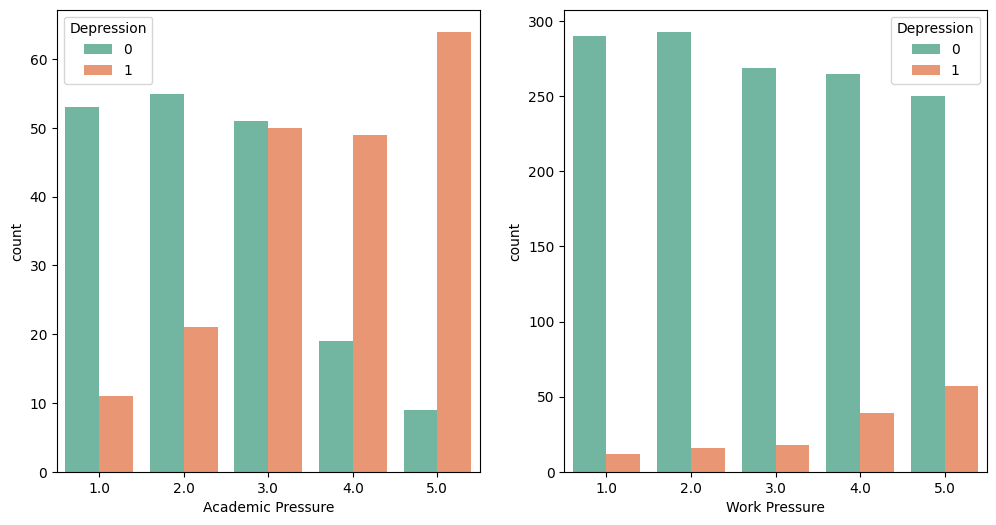

In [191]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

df_student = df[df['Working Professional or Student'] == 'Student']
snus.countplot(x='Academic Pressure', hue='Depression', data=df_student, palette='Set2', ax=axes[0])
df_proffesional = df[df['Working Professional or Student'] == 'Working Professional']
snus.countplot(x='Work Pressure', hue='Depression', data=df_proffesional, palette='Set2', ax=axes[1])

<Axes: xlabel='Job Satisfaction', ylabel='count'>

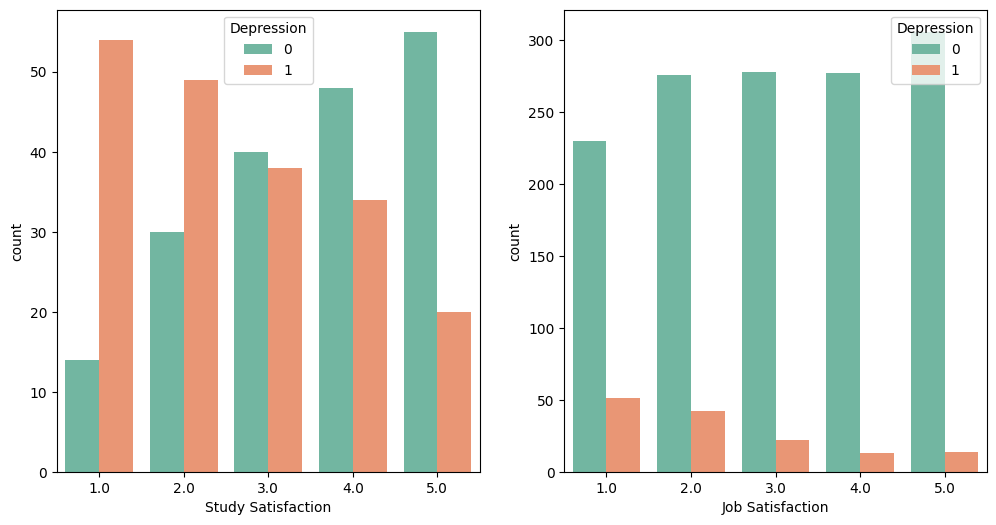

In [192]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

df_student = df[df['Working Professional or Student'] == 'Student']
snus.countplot(x='Study Satisfaction', hue='Depression', data=df_student, palette='Set2', ax=axes[0])
df_proffesional = df[df['Working Professional or Student'] == 'Working Professional']
snus.countplot(x='Job Satisfaction', hue='Depression', data=df_proffesional, palette='Set2', ax=axes[1])

In [193]:
print(f"The percentage of depression among students : {df_student['Depression'].value_counts().get(1, 0) / df_student['Depression'].count() * 100:.2f}%")
print(f"The percentage of depression among professionals : {df_proffesional['Depression'].value_counts().get(1, 0) / df_proffesional['Depression'].count() * 100:.2f}%")

The percentage of depression among students : 51.05%
The percentage of depression among professionals : 9.41%


C:\Users\25583\AppData\Local\Temp\ipykernel_22100\2690934586.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  snus.boxplot(x='Depression', y='CGPA', data=df_student, palette='Set2')


<Axes: xlabel='Depression', ylabel='CGPA'>

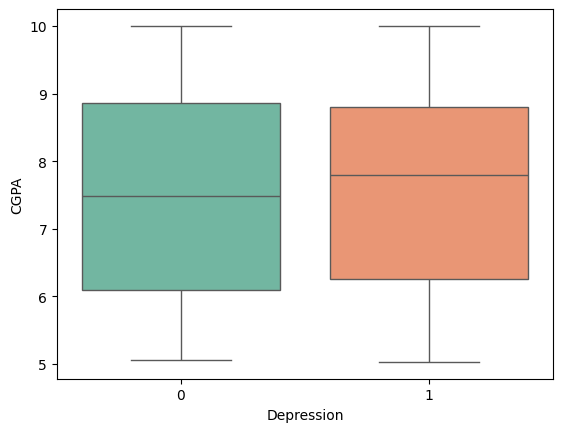

In [194]:
snus.boxplot(x='Depression', y='CGPA', data=df_student, palette='Set2')

In [195]:
X_train = df_student['CGPA']
y_train = df_student['Depression']
log_reg = LogisticRegression()
log_reg.fit(X_train.values.reshape(-1, 1), y_train)
probs = log_reg.predict_proba(X_train.values.reshape(-1, 1))[:, 1]
probs.mean()

np.float64(0.5104729903093764)

In [196]:
df.drop(columns=['CGPA'], inplace=True)

In [197]:
df['Pressure'] = df['Academic Pressure'].fillna(0) + df['Work Pressure'].fillna(0)
df = df.drop(columns=['Academic Pressure', 'Work Pressure'])
df['Satisfaction'] = df['Study Satisfaction'].fillna(0) + df['Job Satisfaction'].fillna(0)
df = df.drop(columns=['Study Satisfaction', 'Job Satisfaction'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1891 entries, 0 to 1890
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 1891 non-null   object 
 1   Age                                    1891 non-null   int64  
 2   City                                   1891 non-null   object 
 3   Working Professional or Student        1891 non-null   object 
 4   Profession                             1380 non-null   object 
 5   Sleep Duration                         1891 non-null   object 
 6   Dietary Habits                         1891 non-null   object 
 7   Degree                                 1891 non-null   object 
 8   Have you ever had suicidal thoughts ?  1891 non-null   object 
 9   Work/Study Hours                       1891 non-null   int64  
 10  Financial Stress                       1891 non-null   int64  
 11  Fami

<Axes: xlabel='City', ylabel='count'>

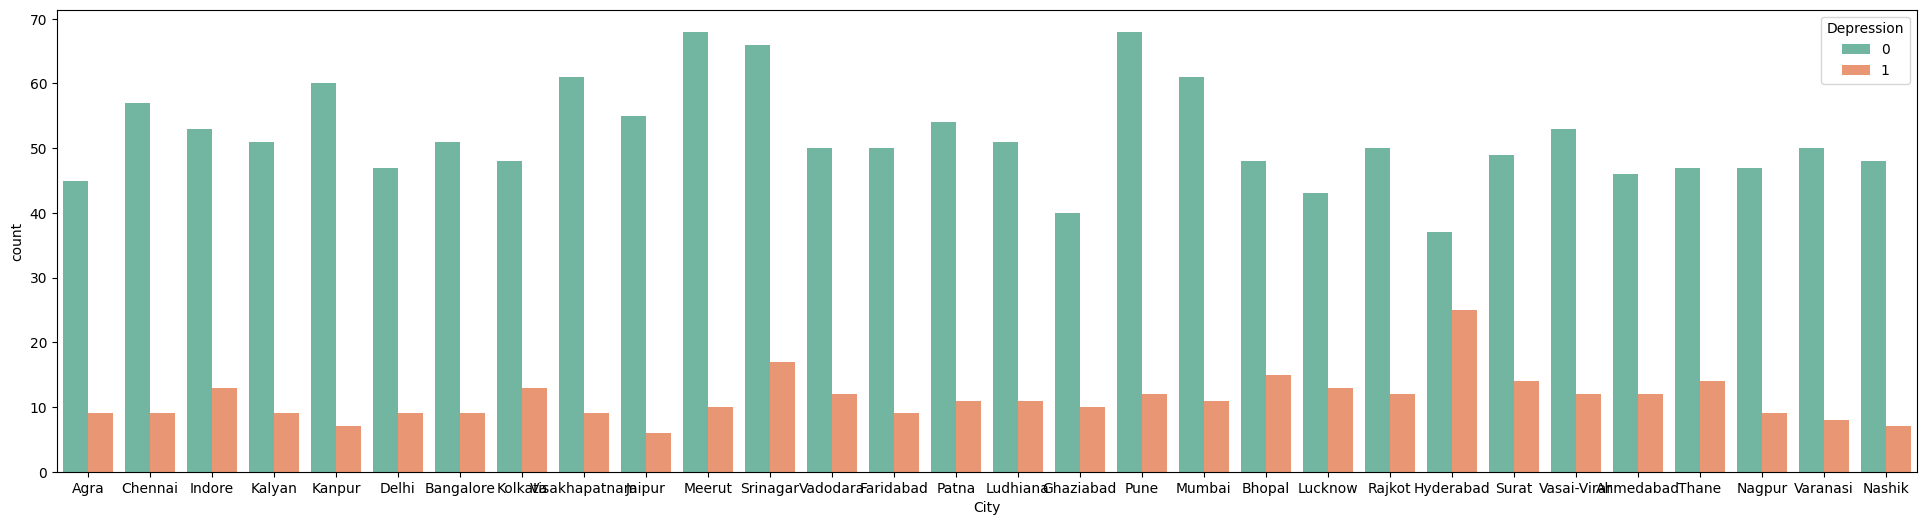

In [198]:
plt.figure(figsize=(24, 6))
snus.countplot(x='City', hue='Depression', data=df, palette='Set2')

129


<Axes: xlabel='Profession', ylabel='count'>

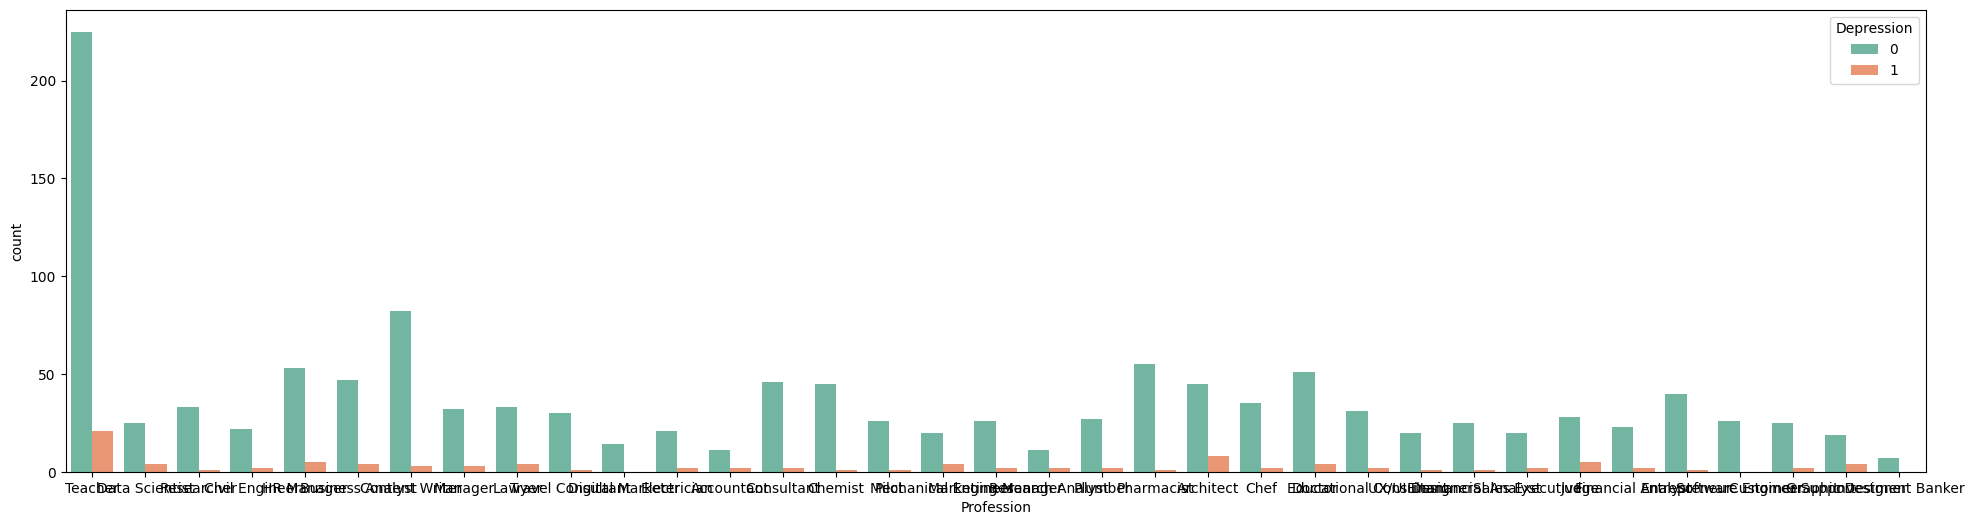

In [199]:

print(df_proffesional['Profession'].isna().sum())
plt.figure(figsize=(24, 6))
snus.countplot(x='Profession', hue='Depression', data=df_proffesional, palette='Set2')

In [200]:
df['Profession'] = df[df['Working Professional or Student'] == 'Working Professional']['Profession'].apply(lambda x: x if pd.notna(x) else 'Unknown')
df['Profession'].fillna('Student', inplace=True)
df

C:\Users\25583\AppData\Local\Temp\ipykernel_22100\3529438348.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Profession'].fillna('Student', inplace=True)


,Gender,Age,City,Working Professional or Student,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,id,Pressure,Satisfaction
0,Male,47,Agra,Working Professional,Teacher,Less than 5 hours,Unhealthy,B.Arch,Yes,11,5,Yes,0,1,1.0,5.0
1,Female,25,Chennai,Student,Student,7-8 hours,Healthy,BSc,No,9,3,No,0,2,3.0,1.0
2,Male,56,Indore,Working Professional,Data Scientist,7-8 hours,Moderate,B.Tech,No,2,4,Yes,0,3,3.0,2.0
3,Female,24,Kalyan,Student,Student,5-6 hours,Moderate,MBBS,Yes,5,3,No,1,4,2.0,2.0
4,Male,55,Kanpur,Working Professional,Researcher,7-8 hours,Unhealthy,BSc,Yes,4,4,No,0,5,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886,Male,50,Ahmedabad,Working Professional,Electrician,More than 8 hours,Healthy,BSc,Yes,2,5,Yes,0,1887,4.0,3.0
1887,Female,28,Vasai-Virar,Student,Student,Less than 5 hours,Moderate,Class 12,Yes,11,5,Yes,1,1888,4.0,2.0
1888,Female,46,Kanpur,Working Professional,Content Writer,More than 8 hours,Unhealthy,BE,No,5,5,No,0,1889,4.0,4.0
1889,Male,23,Meerut,Student,Student,Less than 5 hours,Unhealthy,B.Tech,No,8,5,No,0,1890,2.0,5.0


<Axes: xlabel='Profession'>

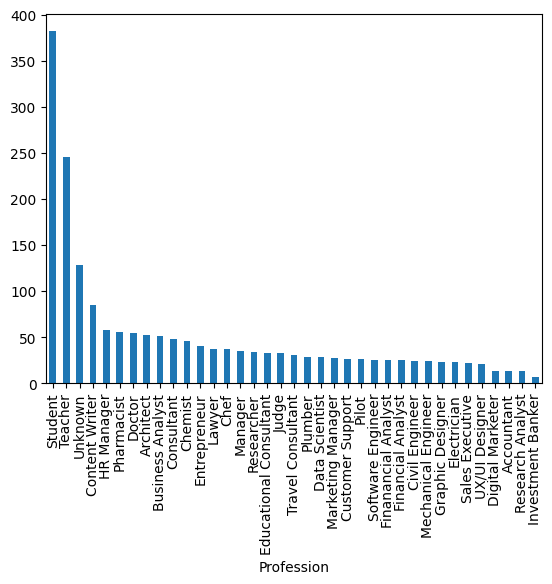

In [201]:
df['Profession'].value_counts().plot(kind='bar')

In [202]:
df['Working Professional or Student'].rename('is Student', inplace=True)
df['is Student'] = df['Working Professional or Student'].apply(lambda x: 1 if x == 'Student' else 0)
df.drop(columns=['Working Professional or Student'], inplace=True)

df['Family History of Mental Illness'] = df['Family History of Mental Illness'].apply(lambda x: 1 if x == 'Yes' else 0)

df

,Gender,Age,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,id,Pressure,Satisfaction,is Student
0,Male,47,Agra,Teacher,Less than 5 hours,Unhealthy,B.Arch,Yes,11,5,1,0,1,1.0,5.0,0
1,Female,25,Chennai,Student,7-8 hours,Healthy,BSc,No,9,3,0,0,2,3.0,1.0,1
2,Male,56,Indore,Data Scientist,7-8 hours,Moderate,B.Tech,No,2,4,1,0,3,3.0,2.0,0
3,Female,24,Kalyan,Student,5-6 hours,Moderate,MBBS,Yes,5,3,0,1,4,2.0,2.0,1
4,Male,55,Kanpur,Researcher,7-8 hours,Unhealthy,BSc,Yes,4,4,0,0,5,1.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886,Male,50,Ahmedabad,Electrician,More than 8 hours,Healthy,BSc,Yes,2,5,1,0,1887,4.0,3.0,0
1887,Female,28,Vasai-Virar,Student,Less than 5 hours,Moderate,Class 12,Yes,11,5,1,1,1888,4.0,2.0,1
1888,Female,46,Kanpur,Content Writer,More than 8 hours,Unhealthy,BE,No,5,5,0,0,1889,4.0,4.0,0
1889,Male,23,Meerut,Student,Less than 5 hours,Unhealthy,B.Tech,No,8,5,0,0,1890,2.0,5.0,1


<Axes: xlabel='Age', ylabel='Depression'>

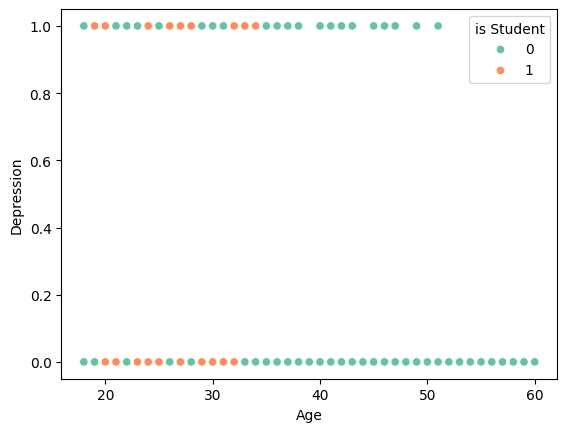

In [203]:
snus.scatterplot(x='Age', y='Depression', data=df, hue='is Student', palette='Set2')

In [204]:
df['Age'] = df['Age'].apply(lambda x: 1 if x < 20 else (2 if x < 30 else (3 if x < 40 else (4 if x < 50 else 5))))
df['Dietary Habits'] = df['Dietary Habits'].apply(lambda x: 1 if x == 'Healthy' else (2 if x == 'Moderate' else 3))
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df

,Gender,Age,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,id,Pressure,Satisfaction,is Student
0,1,4,Agra,Teacher,Less than 5 hours,3,B.Arch,Yes,11,5,1,0,1,1.0,5.0,0
1,0,2,Chennai,Student,7-8 hours,1,BSc,No,9,3,0,0,2,3.0,1.0,1
2,1,5,Indore,Data Scientist,7-8 hours,2,B.Tech,No,2,4,1,0,3,3.0,2.0,0
3,0,2,Kalyan,Student,5-6 hours,2,MBBS,Yes,5,3,0,1,4,2.0,2.0,1
4,1,5,Kanpur,Researcher,7-8 hours,3,BSc,Yes,4,4,0,0,5,1.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886,1,5,Ahmedabad,Electrician,More than 8 hours,1,BSc,Yes,2,5,1,0,1887,4.0,3.0,0
1887,0,2,Vasai-Virar,Student,Less than 5 hours,2,Class 12,Yes,11,5,1,1,1888,4.0,2.0,1
1888,0,4,Kanpur,Content Writer,More than 8 hours,3,BE,No,5,5,0,0,1889,4.0,4.0,0
1889,1,2,Meerut,Student,Less than 5 hours,3,B.Tech,No,8,5,0,0,1890,2.0,5.0,1


<Axes: xlabel='Profession', ylabel='count'>

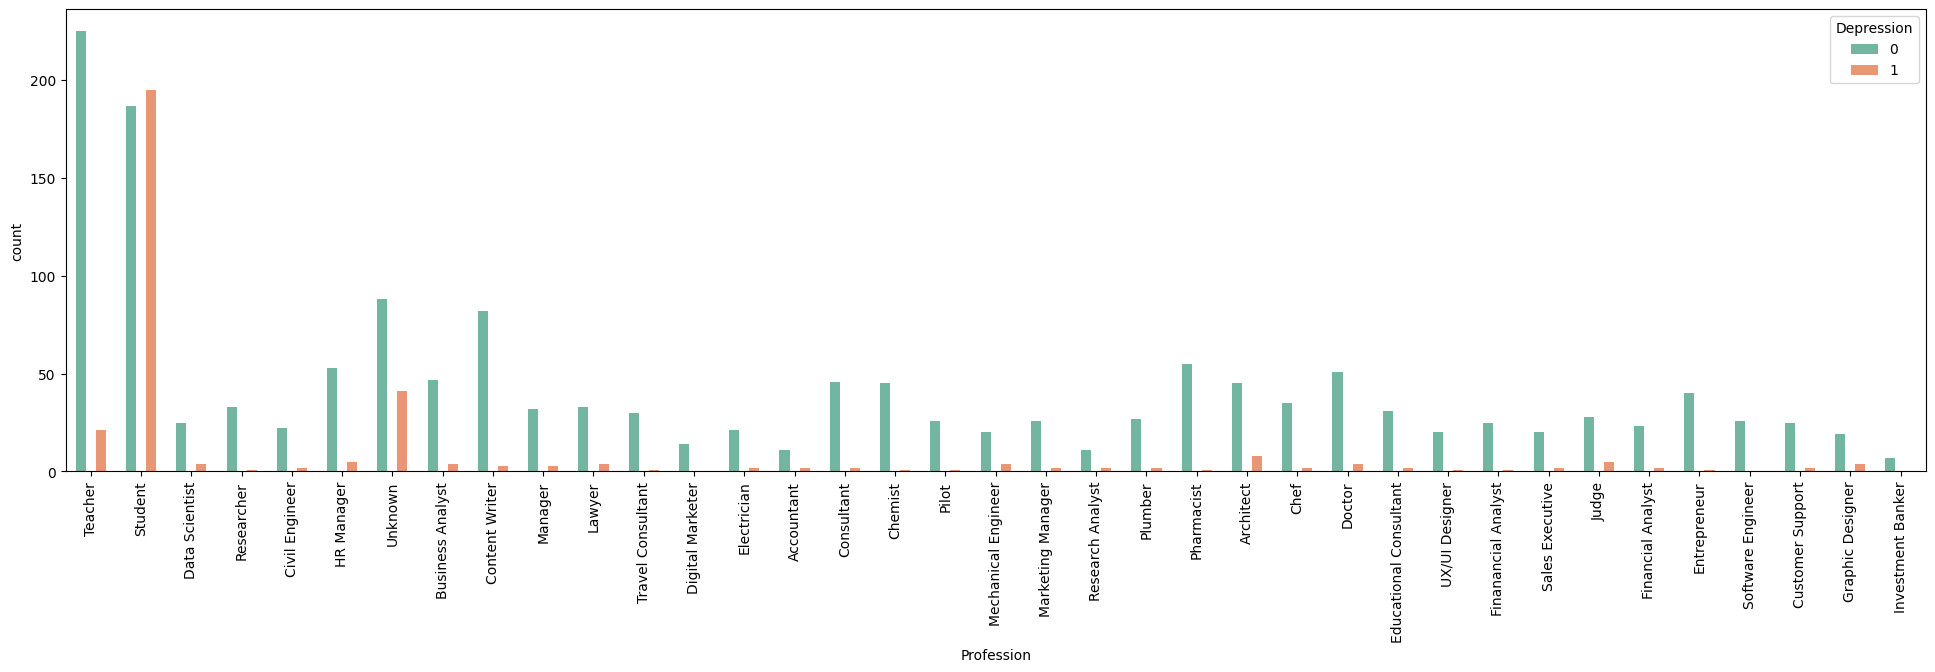

In [205]:
plt.figure(figsize=(24, 6))
plt.xticks(rotation=90)
snus.countplot(x='Profession', hue='Depression', data=df, palette='Set2', gap=0.5)

In [206]:
label_encoder = LabelEncoder()
df['Profession'] = label_encoder.fit_transform(df['Profession'])
df['City'] = label_encoder.fit_transform(df['City'])
df['Degree'] = label_encoder.fit_transform(df['Degree'])
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Sleep Duration'] = label_encoder.fit_transform(df['Sleep Duration'])
df

,Gender,Age,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,id,Pressure,Satisfaction,is Student
0,1,4,0,33,2,3,0,1,11,5,1,0,1,1.0,5.0,0
1,0,2,4,32,1,1,10,0,9,3,0,0,2,3.0,1.0,1
2,1,5,9,9,1,2,4,0,2,4,1,0,3,3.0,2.0,0
3,0,2,11,32,0,2,20,1,5,3,0,1,4,2.0,2.0,1
4,1,5,12,29,1,3,10,1,4,4,0,0,5,1.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886,1,5,1,13,3,1,10,1,2,5,1,0,1887,4.0,3.0,0
1887,0,2,28,32,2,2,11,1,11,5,1,1,1888,4.0,2.0,1
1888,0,4,12,7,3,3,8,0,5,5,0,0,1889,4.0,4.0,0
1889,1,2,16,32,2,3,4,0,8,5,0,0,1890,2.0,5.0,1


In [207]:
df.drop(columns=['id'], inplace=True)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
X_train = df_train.drop(columns=['Depression'])
y_train = df_train['Depression']
X_test = df_test.drop(columns=['Depression'])
y_test = df_test['Depression']

In [208]:
Logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
Logistic_regression.fit(X_train, y_train)
y_pred = Logistic_regression.predict(X_test)
print(f"Logistic Regression F1 Score: {f1_score(y_test, y_pred)}")
Random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
Random_forest.fit(X_train, y_train)
y_pred = Random_forest.predict(X_test)
print(f"Random Forest F1 Score: {f1_score(y_test, y_pred)}")
SVC_model = SVC(probability=True, random_state=42)
SVC_model.fit(X_train, y_train)
y_pred = SVC_model.predict(X_test)
print(f"SVC F1 Score: {f1_score(y_test, y_pred)}")
KNN_model = KNeighborsClassifier(n_neighbors=10)
KNN_model.fit(X_train, y_train)
y_pred = KNN_model.predict(X_test)
print(f"KNN F1 Score: {f1_score(y_test, y_pred)}")
Decision_tree = DecisionTreeClassifier(random_state=42)
Decision_tree.fit(X_train, y_train)
y_pred = Decision_tree.predict(X_test)
print(f"Decision Tree F1 Score: {f1_score(y_test, y_pred)}")

Logistic Regression F1 Score: 0.9384615384615385
Random Forest F1 Score: 0.8429752066115702
SVC F1 Score: 0.4
KNN F1 Score: 0.3617021276595745
Decision Tree F1 Score: 0.7681159420289855


In [209]:
Logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
Logistic_regression.fit(X_train, y_train)
y_pred = Logistic_regression.predict(X_test)
print(f"Logistic Regression F1 Score: {f1_score(y_test, y_pred)}")

Logistic Regression F1 Score: 0.9384615384615385


In [ ]:
df = pd.read_csv('data/train.csv')
df.drop(columns=['CGPA'], inplace=True)

df['Pressure'] = df['Academic Pressure'].fillna(0) + df['Work Pressure'].fillna(0)
df = df.drop(columns=['Academic Pressure', 'Work Pressure'])
df['Satisfaction'] = df['Study Satisfaction'].fillna(0) + df['Job Satisfaction'].fillna(0)
df = df.drop(columns=['Study Satisfaction', 'Job Satisfaction'])

df['Profession'] = df[df['Working Professional or Student'] == 'Working Professional']['Profession'].apply(lambda x: x if pd.notna(x) else 'Unknown')
df['Profession'].fillna('Student')
df_encoded = pd.get_dummies(df, prefix=['', '', 'Familly illnes: ', 'Suicadal thoughts: '], prefix_sep="", columns=['Working Professional or Student', 'Gender', 'Family History of Mental Illness', 'Have you ever had suicidal thoughts ?'], drop_first=False)
label_encoder = LabelEncoder()
df['City'] = label_encoder.fit_transform(df['City'].values)
df['Profession'] = label_encoder.fit_transform(df['Profession'].values)
df_encoded

,Name,Age,City,Profession,Sleep Duration,Dietary Habits,Degree,Work/Study Hours,Financial Stress,Depression,...,Pressure,Satisfaction,Student,Working Professional,Female,Male,Familly illnes: No,Familly illnes: Yes,Suicadal thoughts: No,Suicadal thoughts: Yes
0,Aakash,47,Agra,Teacher,Less than 5 hours,Unhealthy,B.Arch,11,5,0,...,1.0,5.0,False,True,False,True,False,True,False,True
1,Asha,25,Chennai,NaN,7-8 hours,Healthy,BSc,9,3,0,...,3.0,1.0,True,False,True,False,True,False,True,False
2,Samar,56,Indore,Data Scientist,7-8 hours,Moderate,B.Tech,2,4,0,...,3.0,2.0,False,True,False,True,False,True,True,False
3,Chhavi,24,Kalyan,NaN,5-6 hours,Moderate,MBBS,5,3,1,...,2.0,2.0,True,False,True,False,True,False,False,True
4,Anand,55,Kanpur,Researcher,7-8 hours,Unhealthy,BSc,4,4,0,...,1.0,2.0,False,True,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886,Rahil,50,Ahmedabad,Electrician,More than 8 hours,Healthy,BSc,2,5,0,...,4.0,3.0,False,True,False,True,False,True,False,True
1887,Rashi,28,Vasai-Virar,NaN,Less than 5 hours,Moderate,Class 12,11,5,1,...,4.0,2.0,True,False,True,False,False,True,False,True
1888,Barkha,46,Kanpur,Content Writer,More than 8 hours,Unhealthy,BE,5,5,0,...,4.0,4.0,False,True,True,False,True,False,True,False
1889,Ritvik,23,Meerut,NaN,Less than 5 hours,Unhealthy,B.Tech,8,5,0,...,2.0,5.0,True,False,False,True,True,False,True,False
